## Import Necessary libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn 

##  Data Ingestion

In [11]:
df=pd.read_csv(r"data\StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## EDA 

#### Handling Null values 

In [19]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

##### Here we can see there is no any null values 

#### Checking for duplicates 

In [30]:
df.drop_duplicates()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


#### Datatypes

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [35]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Checking for unique values

In [44]:
for i in df.select_dtypes(include='object'):
    print(df[i].value_counts())
    print("\n")

gender
female    518
male      482
Name: count, dtype: int64


race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64


parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


lunch
standard        645
free/reduced    355
Name: count, dtype: int64


test preparation course
none         642
completed    358
Name: count, dtype: int64




In [46]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [50]:
numerical_feature=[i for i in df.select_dtypes(include=['int','float'])]
numerical_feature

['math score', 'reading score', 'writing score']

In [52]:
categorical_feature=[i for i in df.select_dtypes(include=['object'])]
categorical_feature

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

#### Add new features

In [57]:
df['total score']=df['math score']+df['reading score']+df['writing score']
df['average']=df['total score']/3

In [59]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [66]:
reading_full=df[df['reading score']==100]['average'].count()
math_full=df[df['math score']==100]['average'].count()
writing_full=df[df['writing score']==100]['average'].count()

In [72]:
print('number of stdents with full mark in maths:',{math_full})
print('number of stdents with full mark in writing:',{writing_full})
print('number of stdents with full mark in reading:',{reading_full})

number of stdents with full mark in maths: {7}
number of stdents with full mark in writing: {14}
number of stdents with full mark in reading: {17}


In [74]:
reading_less_20=df[df['reading score']<=20]['average'].count()
math_less_20=df[df['math score']<=20]['average'].count()
writing_less_20=df[df['writing score']<=20]['average'].count()

In [78]:
print("Students who gets a mark less than or equal to 20 in math",math_less_20)
print("Students who gets a mark less than or equal to 20 in writing",writing_less_20)
print("Students who gets a mark less than or equal to 20 in reading",reading_less_20)

Students who gets a mark less than or equal to 20 in math 4
Students who gets a mark less than or equal to 20 in writing 3
Students who gets a mark less than or equal to 20 in reading 1


#### Data Visualization

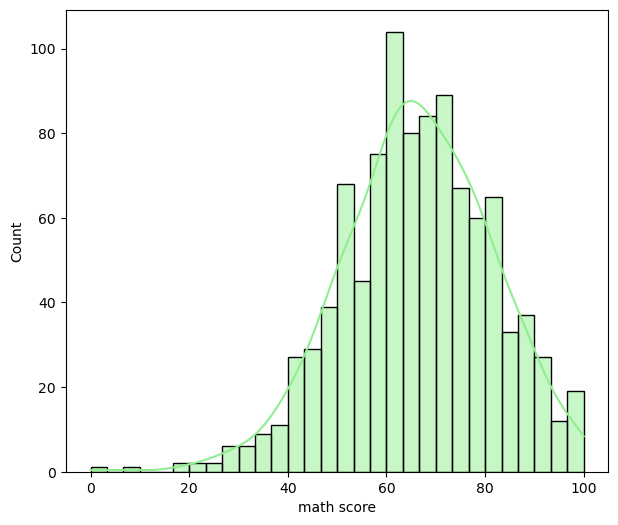

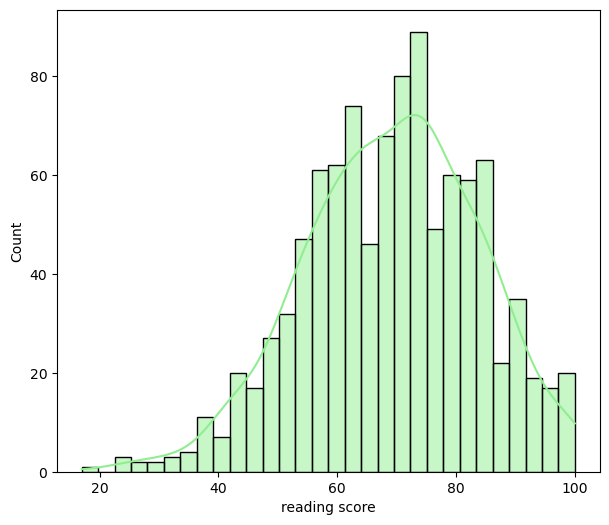

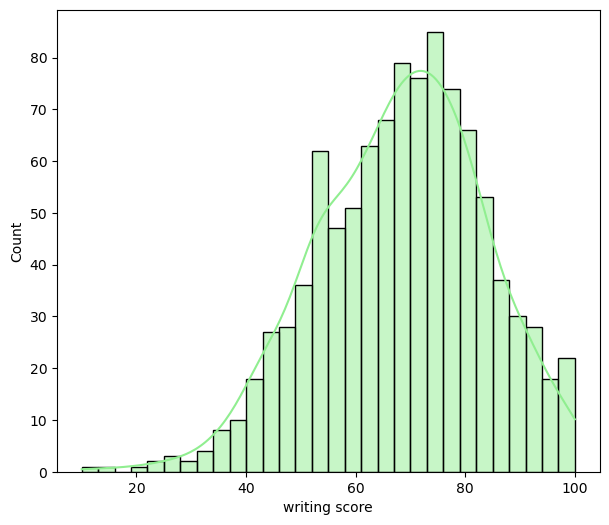

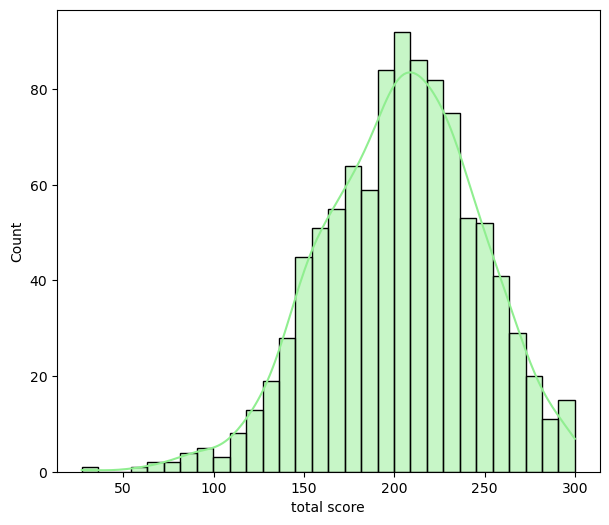

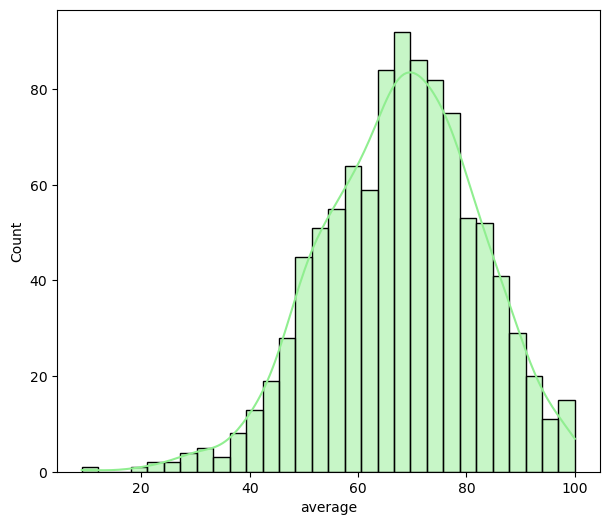

In [87]:
for i in df.select_dtypes(include=['int','float']):
    plt.figure(figsize=(7,6))
    sn.histplot(data=df,x=i,bins=30,kde=True,color='lightgreen')
    plt.show()

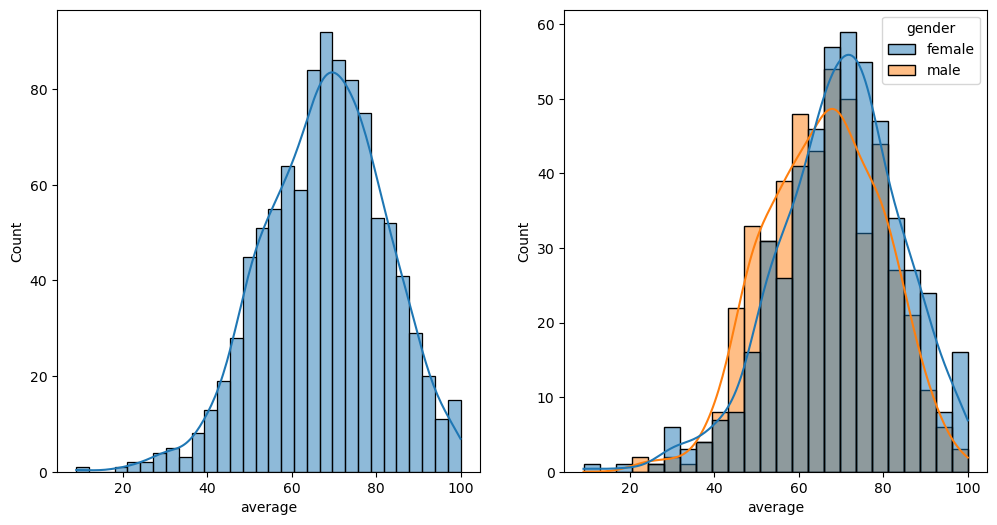

In [109]:
plt.subplots(1,2,figsize=(12,6))
plt.subplot(121)
sn.histplot(data=df,x='average',kde=True,bins=30)
plt.subplot(122)
sn.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()